In [14]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata

This notebook illustrates how the SpaceM output file "spatiomolecular_matrix.csv" can be processed with scanpy and anndata modules.  Written per Luca's instruction by Chris.

In [35]:
# Input file from Andreas' SpaceM workflow
df = pd.read_csv('/Users/dis/PycharmProjects/spaceM_on_drugs/drugs_1_core_metabolome_v2/drugs_1_well_A_region_4/single_cell_analysis/spatiomolecular_matrix.csv')

In [5]:
[print(i) for i in df.columns]

ImageNumber
ObjectNumber
AreaShape_Area
AreaShape_Center_X
AreaShape_Center_Y
AreaShape_Center_Z
AreaShape_Compactness
AreaShape_Eccentricity
AreaShape_EulerNumber
AreaShape_Extent
AreaShape_FormFactor
AreaShape_MajorAxisLength
AreaShape_MaxFeretDiameter
AreaShape_MaximumRadius
AreaShape_MeanRadius
AreaShape_MedianRadius
AreaShape_MinFeretDiameter
AreaShape_MinorAxisLength
AreaShape_Orientation
AreaShape_Perimeter
AreaShape_Solidity
AreaShape_Zernike_0_0
AreaShape_Zernike_1_1
AreaShape_Zernike_2_0
AreaShape_Zernike_2_2
AreaShape_Zernike_3_1
AreaShape_Zernike_3_3
AreaShape_Zernike_4_0
AreaShape_Zernike_4_2
AreaShape_Zernike_4_4
AreaShape_Zernike_5_1
AreaShape_Zernike_5_3
AreaShape_Zernike_5_5
AreaShape_Zernike_6_0
AreaShape_Zernike_6_2
AreaShape_Zernike_6_4
AreaShape_Zernike_6_6
AreaShape_Zernike_7_1
AreaShape_Zernike_7_3
AreaShape_Zernike_7_5
AreaShape_Zernike_7_7
AreaShape_Zernike_8_0
AreaShape_Zernike_8_2
AreaShape_Zernike_8_4
AreaShape_Zernike_8_6
AreaShape_Zernike_8_8
AreaShape_Zer

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [6]:
columns = df.columns
ind = list(columns).index('brightfield_sum')
print(columns[ind:])

Index(['brightfield_sum', 'C8HF15O2+Na', 'C8HF15O2+H', 'C10H11N4O7P+Na',
       'C10H11N4O7P+H', 'C10H14N5O7P+Na', 'C10H15N4O14P3+H',
       'C10H15N5O13P2S+Na', 'C10H16N2O11P2+H', 'C10H17N3O6S+Na',
       ...
       'C63H98O6+H', 'C63H100O6+H', 'C63H102O6+H', 'C63H102O6+Na',
       'C63H104O6+Na', 'C63H104O6+H', 'C63H106O6+H', 'C65H100O6+H',
       'C65H102O6+H', 'C65H104O6+H'],
      dtype='object', length=277)


In [36]:
mol_arr = df.iloc[:, ind+1:].values

In [8]:
# Luca was surprised at the presnce of nan's in arrry, 
# rather than floats 0-inf.
mol_arr

array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [  86.00045991, 1793.86533251,    0.        , ...,    0.        ,
           0.        ,   59.809291  ],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

In [9]:
# nan's are present in parent df as well.
df.iloc[:, ind+1:]

,C8HF15O2+Na,C8HF15O2+H,C10H11N4O7P+Na,C10H11N4O7P+H,C10H14N5O7P+Na,C10H15N4O14P3+H,C10H15N5O13P2S+Na,C10H16N2O11P2+H,C10H17N3O6S+Na,C10H17N3O6S+H,...,C63H98O6+H,C63H100O6+H,C63H102O6+H,C63H102O6+Na,C63H104O6+Na,C63H104O6+H,C63H106O6+H,C65H100O6+H,C65H102O6+H,C65H104O6+H
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.00000,796.363464,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,745.503544,745.794455,0.0,0.0,703.693596,0.0,0.0,0.0,0.000000
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,86.00046,1793.865333,0.0,0.0,0.0,0.0,0.0,893.311431,503.242698,0.0,...,59.906933,831.112237,1140.432331,0.0,0.0,791.346929,0.0,0.0,0.0,59.809291
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Replace nan's with 0
mol_arr = np.nan_to_num(df.iloc[:, ind+1:].values)
mol_arr

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  86.00045991, 1793.86533251,    0.        , ...,    0.        ,
           0.        ,   59.809291  ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [53]:
# Create AnnData object from arr
adata = anndata.AnnData(mol_arr)
adata.var_names = columns[ind+1:]

# Adding an observation to AnnData object, 
# should happen prior to filtering.
adata.obs['Area'] = df['AreaShape_Area'].values
adata

AnnData object with n_obs × n_vars = 81 × 276 
    obs: 'Area'

In [54]:
# Filtering and normalization of AnnData object
# Genes == metabolites

sc.pp.filter_cells(adata, min_genes=1)
sc.pp.normalize_total(adata, target_sum=None)
adata.raw = adata #Keep raw intensities for calculations/plots
sc.pp.log1p(adata)

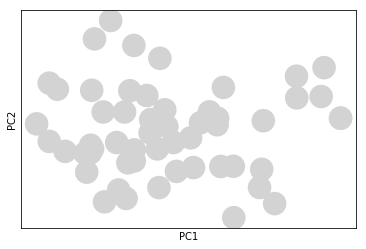

In [55]:
# Example PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)
sc.pp.scale(adata, max_value=None)

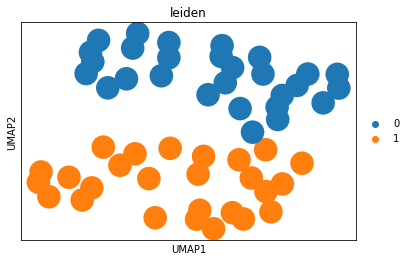

In [56]:
# Leiden UMAP example
sc.pp.neighbors(adata, n_neighbors=5, metric='cosine')#, use_rep='X')
sc.tl.leiden(adata, resolution=0.4)
sc.tl.umap(adata, min_dist=0.5)
sc.pl.umap(adata, color=['leiden'])

/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


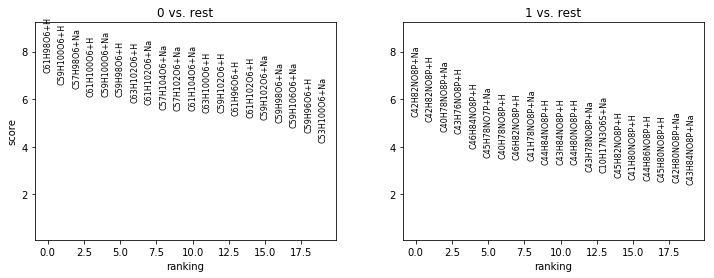

In [57]:
# Loading of clusters example top-20
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', use_raw=False)
sc.pl.rank_genes_groups(adata, sharey=True)

In [58]:
# AnnData is complicated object.  54/81 cells with signal.
adata

AnnData object with n_obs × n_vars = 54 × 276 
    obs: 'Area', 'n_genes', 'leiden'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

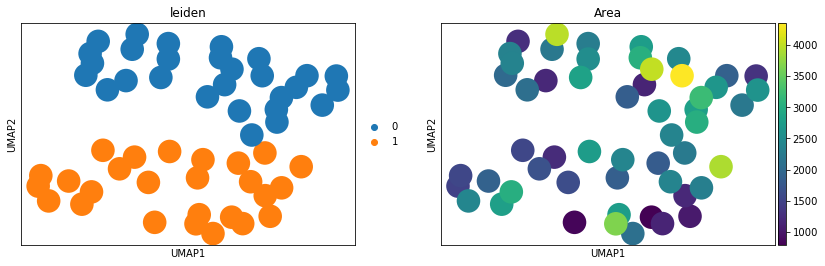

In [59]:
sc.pl.umap(adata, color=['leiden', 'Area'])

In [64]:
# Function from Luca.
def void2array(void):
    return pd.DataFrame(void).values

# Identifying formulas which contribute to group differences.
marker_analysis = adata.uns['rank_genes_groups']
scores = void2array(marker_analysis['scores'])
names = void2array(marker_analysis['names'])

In [65]:
# Important features for group 0 and group 1
names

array([['C61H98O6+H', 'C42H82NO8P+Na'],
       ['C59H100O6+H', 'C42H82NO8P+H'],
       ['C57H98O6+Na', 'C40H78NO8P+Na'],
       ['C61H100O6+H', 'C43H76NO8P+H'],
       ['C59H100O6+Na', 'C46H84NO8P+H'],
       ['C59H98O6+H', 'C45H78NO7P+Na'],
       ['C63H102O6+H', 'C40H78NO8P+H'],
       ['C61H102O6+Na', 'C46H82NO8P+H'],
       ['C57H104O6+Na', 'C41H78NO8P+Na'],
       ['C57H102O6+Na', 'C44H84NO8P+H'],
       ['C61H104O6+Na', 'C43H84NO8P+H'],
       ['C63H100O6+H', 'C44H80NO8P+H'],
       ['C59H102O6+H', 'C43H78NO8P+Na'],
       ['C61H96O6+H', 'C10H17N3O6S+Na'],
       ['C61H102O6+H', 'C45H82NO8P+H'],
       ['C59H102O6+Na', 'C41H80NO8P+H'],
       ['C59H98O6+Na', 'C44H86NO8P+H'],
       ['C59H106O6+Na', 'C45H80NO8P+H'],
       ['C59H96O6+H', 'C42H80NO8P+Na'],
       ['C53H100O6+Na', 'C43H84NO8P+Na'],
       ['C61H108O6+Na', 'C42H80NO8P+H'],
       ['C27H46O4+Na', 'C44H80NO8P+Na'],
       ['C55H98O6+Na', 'C44H78NO8P+H'],
       ['C27H44O+H', 'C42H78NO7P+H'],
       ['C55H100O6+Na', 'C3

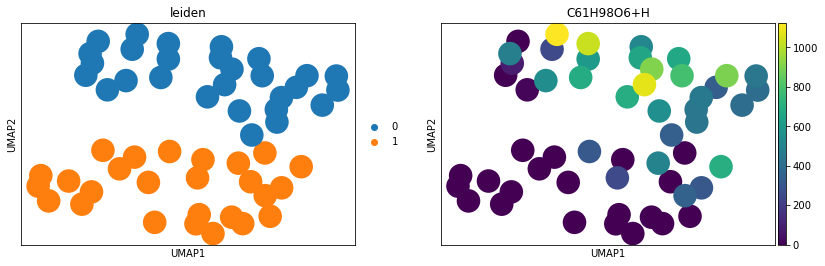

In [63]:
# Group UMAP versus area for most discriminating group 0 feature.
sc.pl.umap(adata, color=['leiden', 'C61H98O6+H'])